In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Test Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of testing examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# <h2> MLP + Dropout + AdamOptimizer </h2>

<h3> 1.Two hidden layers </h3>

In [12]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.models import Sequential 
from keras.layers import Dense, Activation 

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(435, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(156, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

W0825 20:34:50.848045 140160636204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 20:34:50.882638 140160636204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 20:34:50.890069 140160636204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0825 20:34:50.998440 140160636204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0825 20:34:51.022265 14

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 435)               341475    
_________________________________________________________________
batch_normalization_1 (Batch (None, 435)               1740      
_________________________________________________________________
dropout_1 (Dropout)          (None, 435)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 156)               68016     
_________________________________________________________________
batch_normalization_2 (Batch (None, 156)               624       
_________________________________________________________________
dropout_2 (Dropout)          (None, 156)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1570      
Total para

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0825 20:34:56.736942 140160636204928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 20:34:56.864316 140160636204928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.5083 - acc: 0.8449 - val_loss: 0.1680 - val_acc: 0.9472
Epoch 2/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2395 - acc: 0.9288 - val_loss: 0.1190 - val_acc: 0.9637
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1836 - acc: 0.9455 - val_loss: 0.1006 - val_acc: 0.9691
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.1547 - acc: 0.9538 - val_loss: 0.0889 - val_acc: 0.9711
Epoch 5/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1381 - acc: 0.9583 - val_loss: 0.0794 - val_acc: 0.9751
Epoch 6/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1196 - acc: 0.9635 - val_loss: 0.0811 - val_acc: 0.9760
Epoch 7/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.1133 - acc: 0.9648 - val_loss: 0.0718 - 

Test score: 0.054573897721024694
Test accuracy: 0.9833


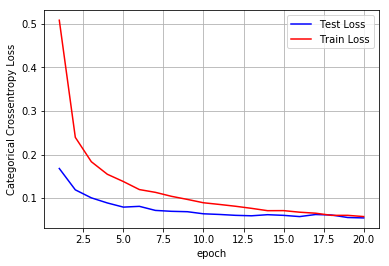

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

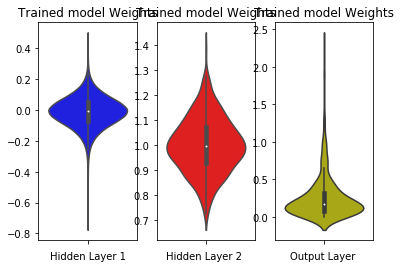

In [15]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> 2.Three hidden layers </h3>

In [16]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.models import Sequential 
from keras.layers import Dense, Activation 

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(506, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(290, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(130, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.225, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 506)               397210    
_________________________________________________________________
batch_normalization_3 (Batch (None, 506)               2024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 506)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 290)               147030    
_________________________________________________________________
batch_normalization_4 (Batch (None, 290)               1160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 290)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 130)               37830     
__________

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.6955 - acc: 0.7879 - val_loss: 0.1848 - val_acc: 0.9435
Epoch 2/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.2897 - acc: 0.9132 - val_loss: 0.1380 - val_acc: 0.9575
Epoch 3/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.2240 - acc: 0.9340 - val_loss: 0.1143 - val_acc: 0.9631
Epoch 4/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.1812 - acc: 0.9461 - val_loss: 0.0989 - val_acc: 0.9703
Epoch 5/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.1579 - acc: 0.9534 - val_loss: 0.0930 - val_acc: 0.9713
Epoch 6/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.1461 - acc: 0.9569 - val_loss: 0.0841 - val_acc: 0.9743
Epoch 7/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.1338 - acc: 0.9596 - val_loss: 0.

Test score: 0.06090008487093437
Test accuracy: 0.9841


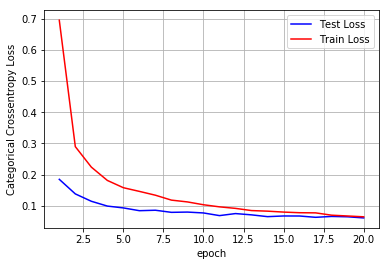

In [18]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

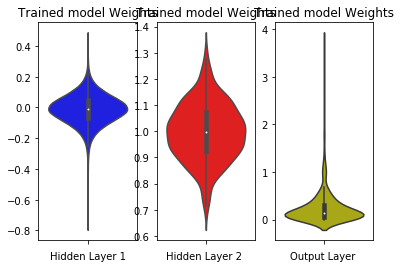

In [19]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> 3.Five hidden layers </h3>

In [20]:
model = Sequential()

model.add(Dense(609, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(510, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(390, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.205, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(270, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.285, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(110, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.325, seed=None)) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 609)               478065    
_________________________________________________________________
batch_normalization_6 (Batch (None, 609)               2436      
_________________________________________________________________
dropout_6 (Dropout)          (None, 609)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 510)               311100    
_________________________________________________________________
batch_normalization_7 (Batch (None, 510)               2040      
_________________________________________________________________
dropout_7 (Dropout)          (None, 510)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 390)               199290    
__________

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 358us/step - loss: 1.3110 - acc: 0.5844 - val_loss: 0.3127 - val_acc: 0.9065
Epoch 2/20
60000/60000 [==============================] - 20s 326us/step - loss: 0.4553 - acc: 0.8648 - val_loss: 0.2066 - val_acc: 0.9399
Epoch 3/20
60000/60000 [==============================] - 20s 328us/step - loss: 0.3142 - acc: 0.9097 - val_loss: 0.1532 - val_acc: 0.9572
Epoch 4/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.2511 - acc: 0.9304 - val_loss: 0.1307 - val_acc: 0.9624
Epoch 5/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.2115 - acc: 0.9400 - val_loss: 0.1109 - val_acc: 0.9685
Epoch 6/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.1863 - acc: 0.9470 - val_loss: 0.1008 - val_acc: 0.9733
Epoch 7/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.1643 - acc: 0.9547 - val_loss: 0.

Test score: 0.07164842545758002
Test accuracy: 0.9812


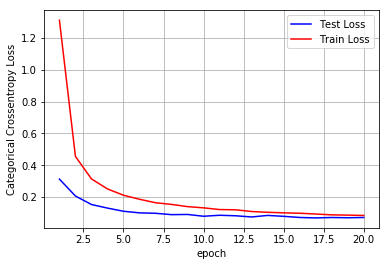

In [22]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

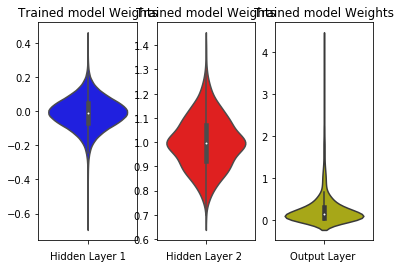

In [24]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  MLP + Sigmoid activation + SGDOptimizer </h3>

In [25]:
#three hidden layers
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(65, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_16 (Dense)             (None, 65)                8385      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                660       
Total params: 476,629
Trainable params: 476,629
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/step - loss: 2.3097 - acc: 0.1075 - val_loss: 2.2973 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 2.2949 - acc: 0.1148 - val_loss: 2.2910 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 5s 83us/step - loss: 2.2887 - acc: 0.1228 - val_loss: 2.2849 - val_acc: 0.1487
Epoch 4/20
60000/60000 [==============================] - 5s 81us/step - loss: 2.2820 - acc: 0.1247 - val_loss: 2.2770 - val_acc: 0.1161
Epoch 5/20
60000/60000 [==============================] - 5s 82us/step - loss: 2.2742 - acc: 0.1406 - val_loss: 2.2682 - val_acc: 0.1145
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 2.2646 - acc: 0.1649 - val_loss: 2.2574 - val_acc: 0.3046
Epoch 7/20
60000/60000 [==============================] - 5s 80us/step - loss: 2.2525 - acc: 0.2492 - val_loss: 2.2437 - val_acc

Test score: 1.1352740411758422
Test accuracy: 0.6817


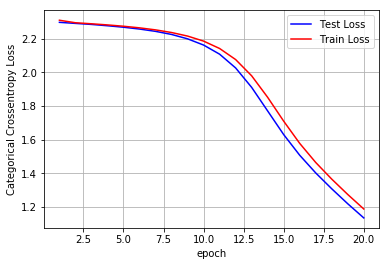

In [27]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

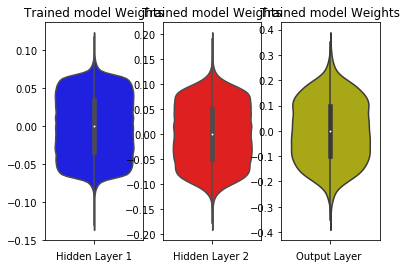

In [28]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>

In [57]:
#five hidden layers with BN and Dropout
model_sigmoid = Sequential()

model_sigmoid.add(Dense(665, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dropout(0.2))

model_sigmoid.add(Dense(456, activation='sigmoid'))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dropout(0.2))

model_sigmoid.add(Dense(348, activation='sigmoid'))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dropout(0.2))

model_sigmoid.add(Dense(250, activation='sigmoid'))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dropout(0.2))

model_sigmoid.add(Dense(115, activation='sigmoid'))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dropout(0.2))

model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 665)               522025    
_________________________________________________________________
batch_normalization_30 (Batc (None, 665)               2660      
_________________________________________________________________
dropout_25 (Dropout)         (None, 665)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 456)               303696    
_________________________________________________________________
batch_normalization_31 (Batc (None, 456)               1824      
_________________________________________________________________
dropout_26 (Dropout)         (None, 456)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 348)               159036    
__________

Test score: 0.0672482188842725
Test accuracy: 0.9833


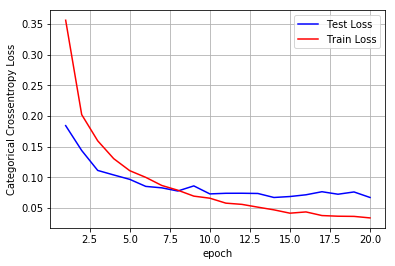

In [58]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

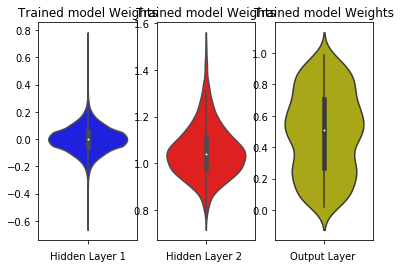

In [59]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + ReLU +SGD </h2>

In [33]:
#three hidden layers with different weight initializations
model_relu = Sequential()
model_relu.add(Dense(548, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(328, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(158, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.187, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 548)               430180    
_________________________________________________________________
dense_26 (Dense)             (None, 328)               180072    
_________________________________________________________________
dense_27 (Dense)             (None, 158)               51982     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1590      
Total params: 663,824
Trainable params: 663,824
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.4969 - acc: 0.8481 - val_loss: 0.2790 - val_acc: 0.9186
Epoch 2/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.2506 - acc: 0.9248 - val_loss: 0.2196 - val_acc: 0.9367
Epoch 3/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.1990 - acc: 0.9407 - val_loss: 0.1914 - val_acc: 0.9450
Epoch 4/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.1674 - acc: 0.9505 - val_loss: 0.1685 - val_acc: 0.9517
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.1456 - acc: 0.9579 - val_loss: 0.1582 - val_acc: 0.9550
Epoch 6/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1287 - acc: 0.9626 - val_loss: 0.1499 - val_acc: 0.9559
Epoch 7/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.1160 - acc: 0.9667 - val_loss: 0.1358 - 

Test score: 0.10271617978247814
Test accuracy: 0.9711


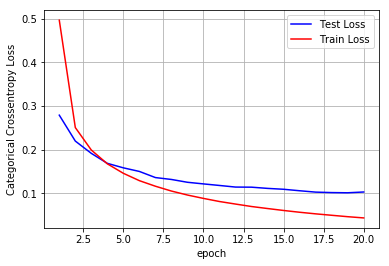

In [35]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

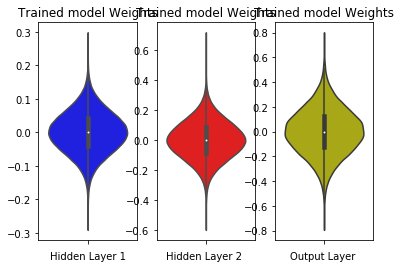

In [36]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

In [40]:
#Five hidden layers with activation='sigmoid', BN & different weight initializations

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(456, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(368, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.85, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(228, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.105, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(123, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.155, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
dense_34 (Dense)             (None, 456)               233928    
_________________________________________________________________
batch_normalization_20 (Batc (None, 456)               1824      
_________________________________________________________________
dense_35 (Dense)             (None, 368)               168176    
_________________________________________________________________
batch_normalization_21 (Batc (None, 368)               1472      
_________________________________________________________________
dense_36 (Dense)             (None, 228)               84132     
__________

In [41]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.3484 - acc: 0.8953 - val_loss: 0.2326 - val_acc: 0.9304
Epoch 2/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.1872 - acc: 0.9433 - val_loss: 0.1792 - val_acc: 0.9466
Epoch 3/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.1451 - acc: 0.9551 - val_loss: 0.1602 - val_acc: 0.9499
Epoch 4/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.1237 - acc: 0.9612 - val_loss: 0.1306 - val_acc: 0.9602
Epoch 5/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.1047 - acc: 0.9675 - val_loss: 0.1287 - val_acc: 0.9616
Epoch 6/20
60000/60000 [==============================] - 15s 248us/step - loss: 0.0951 - acc: 0.9700 - val_loss: 0.1229 - val_acc: 0.9637
Epoch 7/20
60000/60000 [==============================] - 15s 253us/step - loss: 0.0879 - acc: 0.9720 - val_loss: 0.

Test score: 0.10247163554290309
Test accuracy: 0.9707


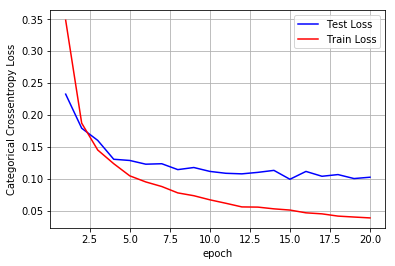

In [42]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

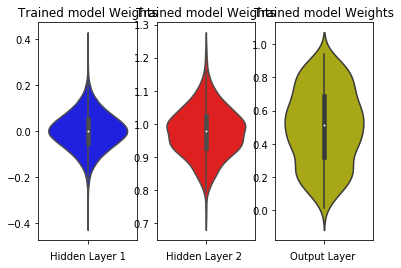

In [43]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> MLP + Dropout + AdamOptimizer </h2>

In [53]:
#three hidden layers with different weight initializations 
model_drop = Sequential()

model_drop.add(Dense(412, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(228, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(98, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.95, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.3))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 412)               323420    
_________________________________________________________________
batch_normalization_27 (Batc (None, 412)               1648      
_________________________________________________________________
dropout_22 (Dropout)         (None, 412)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 228)               94164     
_________________________________________________________________
batch_normalization_28 (Batc (None, 228)               912       
_________________________________________________________________
dropout_23 (Dropout)         (None, 228)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 98)                22442     
__________

In [54]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.7992 - acc: 0.7470 - val_loss: 0.3394 - val_acc: 0.8997
Epoch 2/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.4700 - acc: 0.8568 - val_loss: 0.2916 - val_acc: 0.9153
Epoch 3/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.4104 - acc: 0.8754 - val_loss: 0.2607 - val_acc: 0.9242
Epoch 4/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.3763 - acc: 0.8863 - val_loss: 0.2415 - val_acc: 0.9298
Epoch 5/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.3557 - acc: 0.8930 - val_loss: 0.2300 - val_acc: 0.9331
Epoch 6/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.3318 - acc: 0.8991 - val_loss: 0.2219 - val_acc: 0.9339
Epoch 7/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.3157 - acc: 0.9058 - val_loss: 0.2118 -

Test score: 0.12330705345384776
Test accuracy: 0.9624


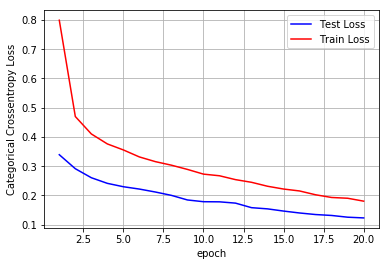

In [55]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

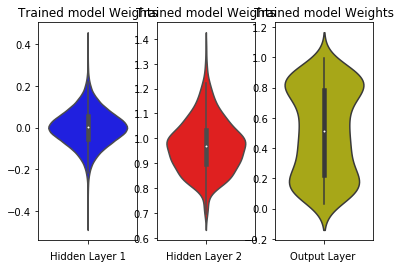

In [56]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Conclusion. </h2>

In [60]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Activation Function","optimizer","Batch Normalisations","Dropout","No. of hidden layers", "Test Score", "Test Accuracy"]

x.add_row(["relu", "AdamOptimizer", "Yes", 0.5, 2, 0.054, 0.98])
x.add_row(["relu", "AdamOptimizer", "Yes", 0.5, 3, 0.060, 0.98])
x.add_row(["relu", "AdamOptimizer", "Yes", 0.5, 5, 0.071, 0.98])
x.add_row(["relu", "SGDOptimizer", "No", "No dropout", 3, 0.102, 0.97])
x.add_row(["Sigmoid", "SGDOptimizer", "No", "No droput", 3, 1.13, 0.68])
x.add_row(["Sigmoid", "AdamOptimizer", "Yes", 0.2, 5, 0.067, 0.98])
x.add_row(["Sigmoid", "AdamOptimizer", "Yes", "No droput", 5, 0.102, 0.97])
x.add_row(["Sigmoid", "AdamOptimizer", "Yes", 0.3, 3, 0.123, 0.96])
print(x)

+---------------------+---------------+----------------------+------------+----------------------+------------+---------------+
| Activation Function |   optimizer   | Batch Normalisations |  Dropout   | No. of hidden layers | Test Score | Test Accuracy |
+---------------------+---------------+----------------------+------------+----------------------+------------+---------------+
|         relu        | AdamOptimizer |         Yes          |    0.5     |          2           |   0.054    |      0.98     |
|         relu        | AdamOptimizer |         Yes          |    0.5     |          3           |    0.06    |      0.98     |
|         relu        | AdamOptimizer |         Yes          |    0.5     |          5           |   0.071    |      0.98     |
|         relu        |  SGDOptimizer |          No          | No dropout |          3           |   0.102    |      0.97     |
|       Sigmoid       |  SGDOptimizer |          No          | No droput  |          3           |    1.

<h2> Obervations: </h2>

<h3>1.We can see with different architecture,activation function & optimizer test score and test accuracy have changed differently 

<h3>2.from above table, we can observe relu activation have  minimum test score and maximum test accuracy.

<h3>3.AdamOptimizer is better than sgdoptimizer

<h3>4.Batch Normalisations and Dropout are playing important role in improving test accuracy

<h3>5.MLP having sigmoid activation and sgdoptimizer alongwith three hidden layers and no BN & dropout are having very minimum accuracy i.e.0.68

<h3>6.With keras it become easy to implement deep neural network.While doing this assignment I learned many new things.Deep learning is very powerful than classical modeling.